In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr                     
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import glob
from datetime import date, time, datetime 
import pandas as pd
import netCDF4 as net
import os
from os import listdir
from os.path import join, isfile

In [2]:
foldername = '/Users/emmagurcan/Documents/JPL_2021/Swot_Simulator_Code/model_swot_ouput/C01'
data_files = [f for f in listdir(foldername) if isfile(join(foldername, f))]

In [3]:
print(data_files)

['MODEL_science_c01_p528.nc', 'MODEL_science_c01_p015.nc', 'MODEL_science_c01_p237.nc', 'MODEL_science_c01_p377.nc', 'MODEL_science_c01_p306.nc', '.DS_Store', 'MODEL_science_c01_p362.nc', 'MODEL_science_c01_p222.nc', 'MODEL_science_c01_p071.nc', 'MODEL_science_c01_p349.nc', 'MODEL_science_c01_p209.nc', 'MODEL_science_c01_p472.nc', 'MODEL_science_c01_p099.nc', 'MODEL_science_c01_p543.nc', 'MODEL_science_c01_p584.nc', 'MODEL_science_c01_p278.nc', 'MODEL_science_c01_p556.nc', 'MODEL_science_c01_p487.nc', 'MODEL_science_c01_p500.nc', 'MODEL_science_c01_p571.nc', 'MODEL_science_c01_p028.nc', 'MODEL_science_c01_p515.nc', 'MODEL_science_c01_p293.nc', 'MODEL_science_c01_p194.nc', 'MODEL_science_c01_p250.nc', 'MODEL_science_c01_p056.nc', 'MODEL_science_c01_p334.nc', 'MODEL_science_c01_p265.nc', 'MODEL_science_c01_p181.nc', 'MODEL_science_c01_p321.nc', 'MODEL_science_c01_p043.nc', 'MODEL_science_c01_p084.nc']


In [4]:
# I had a .DS_Store file in my folder, so I needed to remove it
data_files.pop(5)

'.DS_Store'

In [5]:
def plot_swot_output(filename):
    model_dset = xr.open_dataset(filename)
    model_ssh = model_dset['ssh_obs']
    model_ssh = np.where(model_ssh<0, np.NaN, model_ssh)
    
    lon = model_dset['lon']
    lat = model_dset['lat']
    
    plt.scatter(lon, lat, c=model_ssh, s=2, cmap='coolwarm')

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/emmagurcan/opt/anaconda3/lib/python3.8/site-packages/matplotlib/colors.py:1159: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


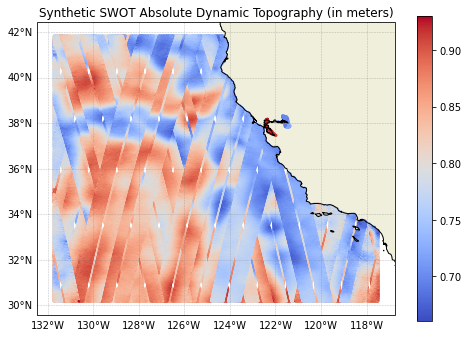

In [6]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
               linewidth=.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False 
    
for f in data_files:
    name = os.path.join('/Users/emmagurcan/Documents/JPL_2021/Swot_Simulator_Code/model_swot_ouput/C01', f)
    plot_swot_output(name)

# coastlines
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

# colorbar
plt.colorbar(shrink = 0.7)

# set title
title = 'Synthetic SWOT Absolute Dynamic Topography (in meters)'
plt.title(title)

plt.show()

<ipython-input-7-c0c507cbbd89>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4, 4))


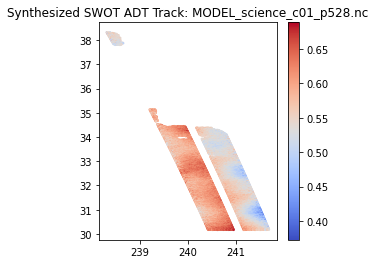

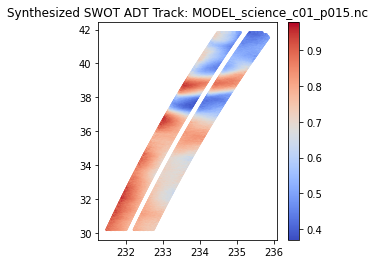

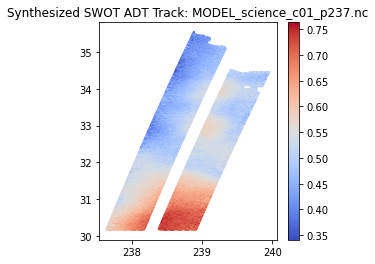

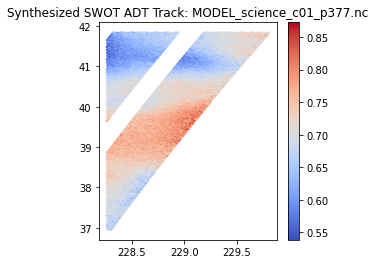

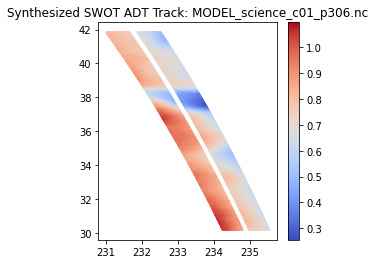

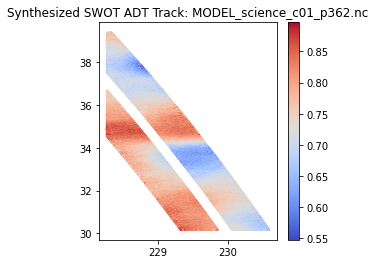

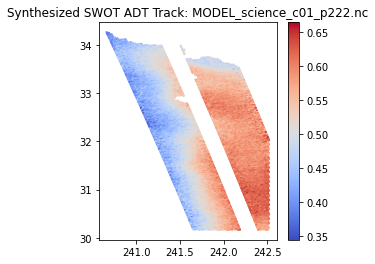

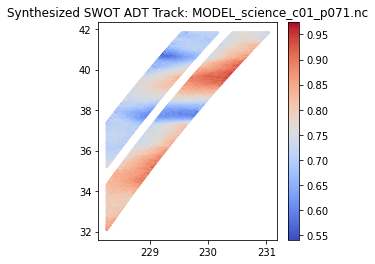

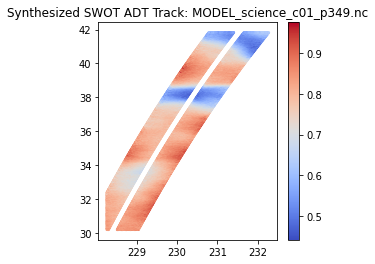

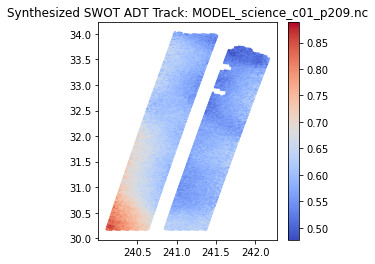

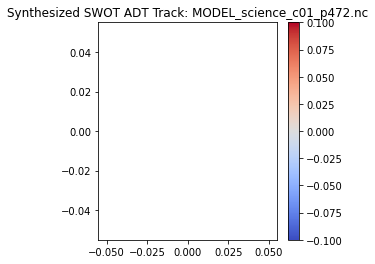

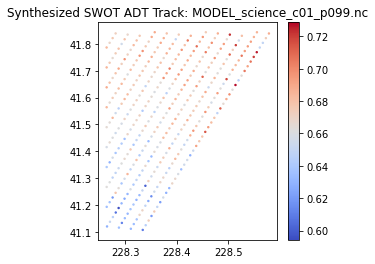

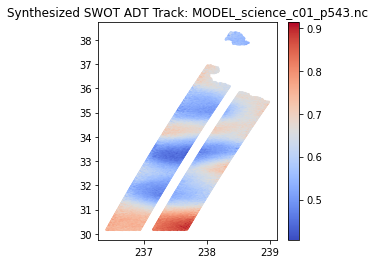

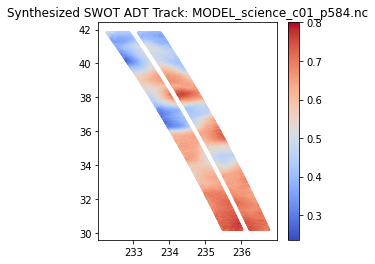

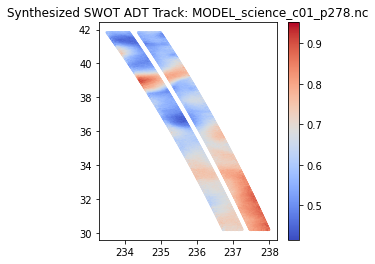

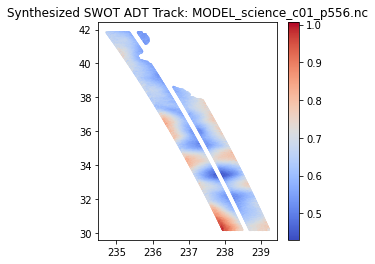

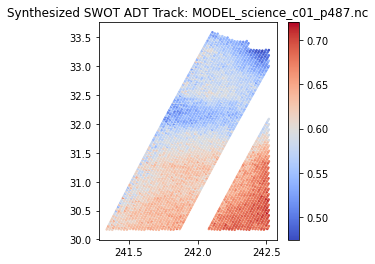

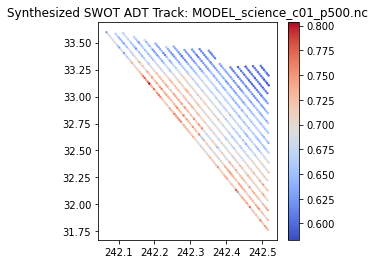

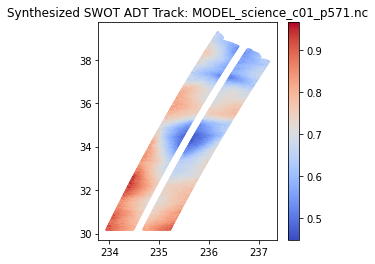

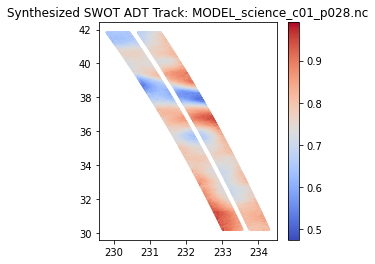

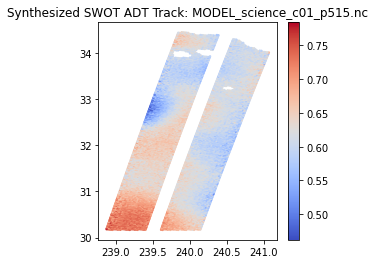

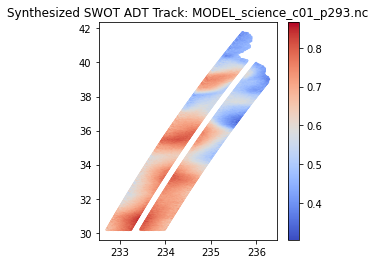

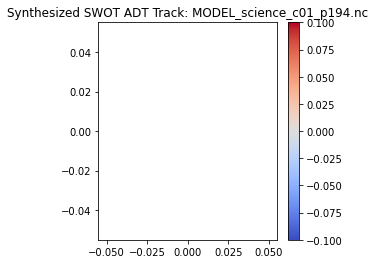

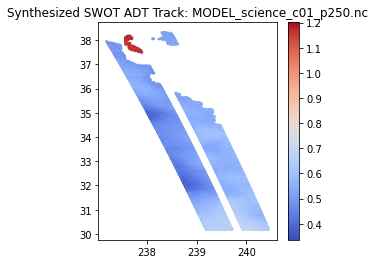

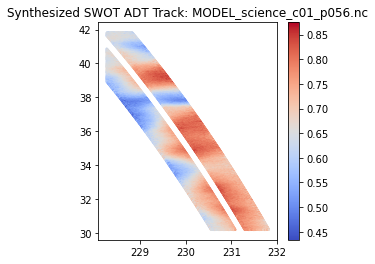

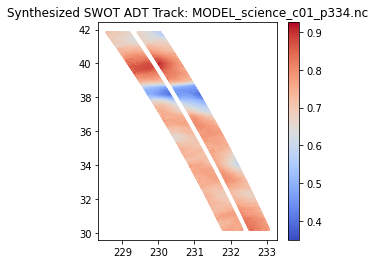

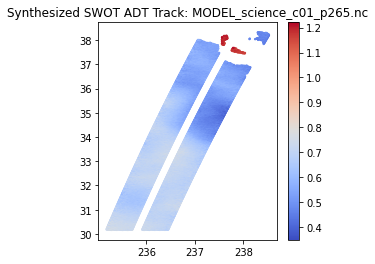

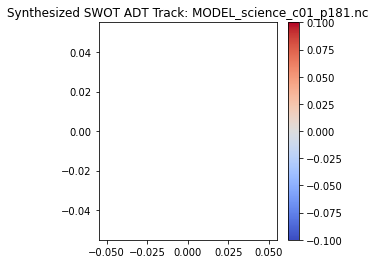

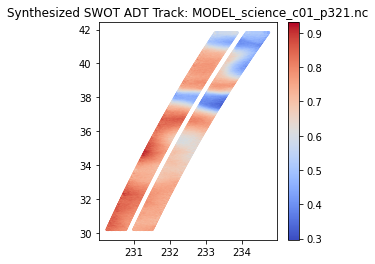

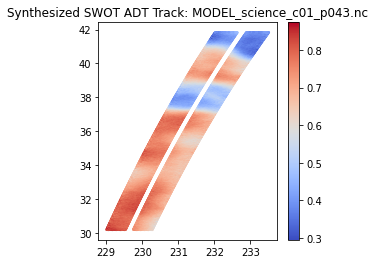

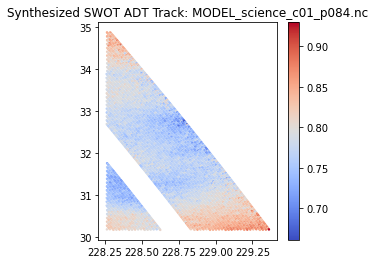

In [7]:
for f in data_files:
    name = os.path.join('/Users/emmagurcan/Documents/JPL_2021/Swot_Simulator_Code/model_swot_ouput/C01', f)
    model_dset = xr.open_dataset(name)
    model_ssh = model_dset['ssh_obs']
    model_ssh = np.where(model_ssh<0, np.NaN, model_ssh)
    lon = model_dset['lon']
    lat = model_dset['lat']
    
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot()
    plt.scatter(lon, lat, c=model_ssh, s=2, cmap='coolwarm')
    title = 'Synthesized SWOT ADT Track: ' + f
    plt.title(title)
    plt.colorbar()